In [31]:
import numpy as np
import pandas as pd
import pickle

In [32]:
company = pickle.load( open( "company.pickle", "rb" ) )
action = pickle.load( open( "action.pickle", "rb" ) )
data = pickle.load( open( "data.pickle", "rb" ) )

In [37]:
def makecolmatr(feature_name, dataframe):
    from tslearn.utils import to_time_series_dataset 
    from sklearn import preprocessing
    from tslearn.clustering import GlobalAlignmentKernelKMeans
    
    pddd = pd.DataFrame(data=dataframe)
    pdddt = pddd.T
    pdddt = pdddt.apply(pd.to_numeric, errors='coerce')
    #pdddt = pdddt.apply(norm_to_zero_one)

    time_series_list_new = pdddt.values
    
    time_series_list_new2 = []

    #for i in range(0, len(time_series_list_new)):
    #    listttt = [x for x in time_series_list_new[i] if str(x) != 'nan' and str(x) != 'NaN']
    #    time_series_list_new2.append(listttt)
    
    # Quick & Dirty Fix for len 25
    
    #for i in range(0, len(time_series_list_new)):
    #    if len(time_series_list_new[i]) > 24:
    #        time_series_list_new[i].pop(25)
    #    print( len(time_series_list_new[i]) )
    #    time_series_list_new2.append(time_series_list_new[i])

    
    #from sklearn import preprocessing
    #from sklearn.preprocessing import StandardScaler
    
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(time_series_list_new)
    Xs = scaler.transform(time_series_list_new)
    
    #Xs = preprocessing.scale(time_series_list_new)
    
    X = to_time_series_dataset(Xs.T)#time_series_list_new)
    
    
    #for i in range( len(X) ):
    #    print( len(X[i]) )
    
    #print(X)
    
    from tslearn.metrics import cdist_gak
    X2 = cdist_gak(X, X, sigma = 1.)
    
    from tslearn.clustering import GlobalAlignmentKernelKMeans
    from tslearn.clustering import silhouette_score
    from operator import itemgetter
    
    range_n_clusters = []
    for i in range(4,11):
        range_n_clusters.append(i)
    print(range_n_clusters)
    
    #range_n_clusters = [3, 4, 5, 6, 7, 8, 9]
    s_sc = np.zeros(len(range_n_clusters))
    labels_gak = np.zeros((len(range_n_clusters), len(X)))
    for i in range(len(range_n_clusters)):
        if GlobalAlignmentKernelKMeans(
            n_clusters=range_n_clusters[i], n_init=15, max_iter=100, verbose=False, random_state=0).fit(X).X_fit_ is not None:
            gak_km = GlobalAlignmentKernelKMeans(n_clusters=range_n_clusters[i], n_init=15, max_iter=100, verbose=False, random_state=0)
    # Labels returned by K-means 
            labels_gak[i,:] = gak_km.fit_predict(X)
            #print(labels_gak[i,:])
            s_sc[i] = silhouette_score(X2, labels_gak[i,:], metric = 'precomputed')
        else:
            s_sc[i] = -2
    print(s_sc)
    idx = np.where(s_sc == np.amax(s_sc))
    idx = idx[0]
    n_cluster = itemgetter(*idx)(range_n_clusters)
    
    #n_cluster = 5
    
    print("Gotten n_cluster : " + str(n_cluster))
    
    gak_km = GlobalAlignmentKernelKMeans(n_clusters=n_cluster, n_init=15, max_iter=100, verbose=False, random_state=0).fit(X)

    labels_gak = gak_km.fit_predict(X)
    
    return labels_gak

In [6]:
def norm_to_zero_one(df):
    return (df - df.mean(skipna=True)) / df.std(skipna=True)

In [7]:
#del data['P/E (Diluted, Excl. EI)']
#del data['Free Cash Flow/Operating Cash Flow']
#del data['Price/Book']

In [38]:
#featureTable =
featureTable = pd.DataFrame()

for ele in data:
    #length1 = len(cleaned_data_dict[ele])
    #length2 = len(cleaned_action_dict[ele])
    print(ele + " - Processing...")
    labels_gak = makecolmatr(ele, data[ele])
    labels_gak_pd = pd.DataFrame(data=labels_gak, columns=[ele], index=company['Enterprise Value Multiple']) #,index=company['Enterprise Value Multiple']
    #print(labels_gak_pd)
    featureTable = pd.concat([featureTable, labels_gak_pd], axis=1)#sort=False)

Enterprise Value Multiple - Processing...
[4, 5, 6, 7, 8, 9, 10]
[-0.98312405 -0.99408579 -0.99741547 -0.99793997 -0.99779643 -0.99833415
 -0.99976603]
Gotten n_cluster : 4
P/E (Diluted, Excl. EI) - Processing...
[4, 5, 6, 7, 8, 9, 10]
[-0.99261072 -0.99713476 -0.99849519 -0.99941384 -0.9997327  -0.99977666
 -0.99988863]
Gotten n_cluster : 4
Price/Cash flow - Processing...
[4, 5, 6, 7, 8, 9, 10]
[-0.98695587 -0.99626827 -0.99768345 -0.9983139  -0.99908885 -0.99984361
 -0.99974509]
Gotten n_cluster : 4
Net Profit Margin - Processing...
[4, 5, 6, 7, 8, 9, 10]
[-0.98209689 -0.99621487 -0.99534682 -0.99766169 -0.99929642 -0.99962582
 -0.99994409]
Gotten n_cluster : 4
Gross Profit Margin - Processing...
[4, 5, 6, 7, 8, 9, 10]
[-0.98396842 -0.99354205 -0.99506851 -0.99807323 -0.99822901 -0.99875275
 -0.99866741]
Gotten n_cluster : 4
Return on Assets - Processing...
[4, 5, 6, 7, 8, 9, 10]
[-0.97671758 -0.99080396 -0.99586855 -0.9958168  -0.99907978 -0.99917459
 -0.9996888 ]
Gotten n_cluster :

In [9]:
featureTable

Enterprise Value Multiple  P/E (Diluted, Excl. EI)  \
XOM US Equity                             1                        2   
XOM US Equity1                            0                        2   
XOM US Equity2                            0                        1   
XOM US Equity3                            0                        2   
XOM US Equity4                            0                        2   
WMT US Equity1                            1                        1   
WMT US Equity2                            1                        1   
WMT US Equity3                            1                        1   
WMT US Equity4                            1                        1   
WMT US Equity5                            1                        1   
WMT US Equity6                            1                        1   
WMT US Equity7                            1                        1   
WMT US Equity8                            1                        1   
WMT US Equity9                            1                        1   
WMT US Equity10                           1                        1   
WFC US Equity3                            2                        1   
WFC US Equity4                            2                        1   
WFC US Equity5                            2                        1   
WFC US Equity6                            2                        1   
WFC US Equity7                            3                        1   
WFC US Equity8                            3                        1   
WFC US Equity9                            3                        1   
WFC US Equity10                           4                        0   
WFC US Equity11                           4                        0   
WFC US Equity12                           4                        0   
WFC US Equity13                           4                        0   
WFC US Equity14                           4                        0   
WFC US Equity15                           4                        0   
WFC US Equity16                           2                        0   
WFC US Equity17                           2                        0   
...                                     ...                      ...   
BK US Equity5                             3                        1   
BK US Equity6                             3                        1   
BK US Equity7                             3                        1   
BK US Equity8                             3                        1   
BK US Equity9                             1                        1   
BK US Equity10                            1                        1   
BK US Equity11                            1                        0   
BK US Equity12                            1                        2   
BK US Equity13                            0                        1   
BK US Equity14                            1                        1   
BK US Equity15                            0                        3   
BDX US Equity                             4                        3   
BDX US Equity1                            4                        3   
BDX US Equity2                            4                        3   
BDX US Equity3                            4                        3   
BDX US Equity4                            4                        3   
ANTM US Equity                            1                        1   
ANTM US Equity1                           1                        1   
ANTM US Equity2                           1                        1   
ANTM US Equity3                           1                        1   
ADM US Equity                             3                        2   
ADM US Equity1                            3                        2   
AAPL US Equity3                           3                        2   
AAPL US Equity4                           3               

In [41]:
featureTable

Enterprise Value Multiple  P/E (Diluted, Excl. EI)  \
XOM US Equity                             2                        0   
XOM US Equity1                            3                        1   
XOM US Equity2                            0                        0   
XOM US Equity3                            3                        0   
XOM US Equity4                            1                        0   
WMT US Equity1                            0                        3   
WMT US Equity2                            0                        0   
WMT US Equity3                            0                        2   
WMT US Equity4                            2                        0   
WMT US Equity5                            1                        0   
WMT US Equity6                            1                        1   
WMT US Equity7                            1                        1   
WMT US Equity8                            2                        1   
WMT US Equity9                            2                        1   
WMT US Equity10                           2                        0   
WFC US Equity3                            1                        2   
WFC US Equity4                            1                        2   
WFC US Equity5                            1                        2   
WFC US Equity6                            1                        2   
WFC US Equity7                            0                        1   
WFC US Equity8                            0                        0   
WFC US Equity9                            2                        0   
WFC US Equity10                           2                        3   
WFC US Equity11                           2                        3   
WFC US Equity12                           2                        3   
WFC US Equity13                           2                        3   
WFC US Equity14                           2                        3   
WFC US Equity15                           2                        3   
WFC US Equity16                           3                        3   
WFC US Equity17                           3                        3   
...                                     ...                      ...   
BK US Equity5                             3                        2   
BK US Equity6                             1                        3   
BK US Equity7                             1                        3   
BK US Equity8                             1                        3   
BK US Equity9                             3                        0   
BK US Equity10                            1                        0   
BK US Equity11                            3                        0   
BK US Equity12                            0                        1   
BK US Equity13                            3                        3   
BK US Equity14                            3                        2   
BK US Equity15                            1                        1   
BDX US Equity                             1                        1   
BDX US Equity1                            2                        2   
BDX US Equity2                            0                        2   
BDX US Equity3                            0                        2   
BDX US Equity4                            2                        2   
ANTM US Equity                            3                        1   
ANTM US Equity1                           3                        0   
ANTM US Equity2                           1                        3   
ANTM US Equity3                           0                        1   
ADM US Equity                             1                        3   
ADM US Equity1                            2                        1   
AAPL US Equity3                           0                        2   
AAPL US Equity4                           1               

Enterprise Value Multiple - Drawing...


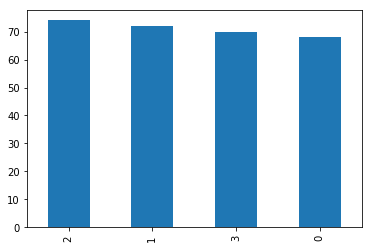

P/E (Diluted, Excl. EI) - Drawing...


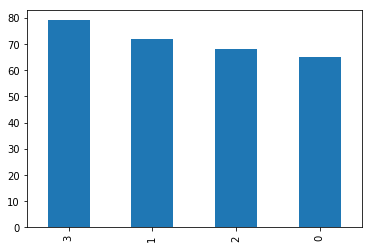

Price/Cash flow - Drawing...


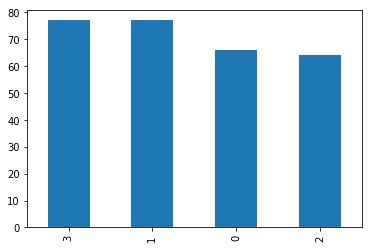

Net Profit Margin - Drawing...


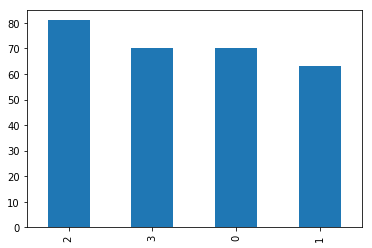

Gross Profit Margin - Drawing...


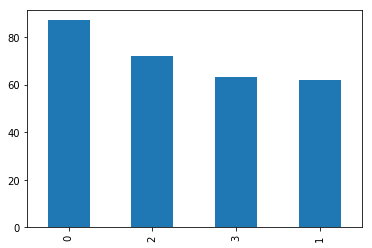

Return on Assets - Drawing...


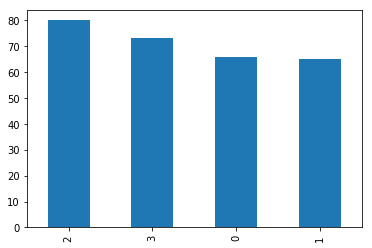

Return on Equity - Drawing...


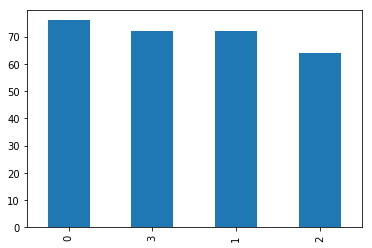

Gross Profit/Total Assets - Drawing...


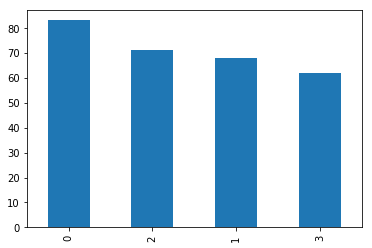

Common Equity/Invested Capital - Drawing...


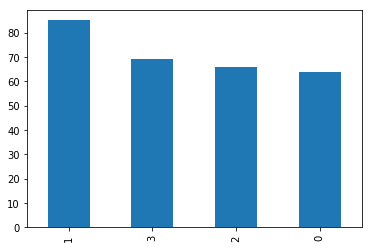

Cash Flow/Total Debt - Drawing...


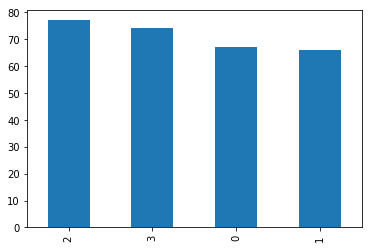

Free Cash Flow/Operating Cash Flow - Drawing...


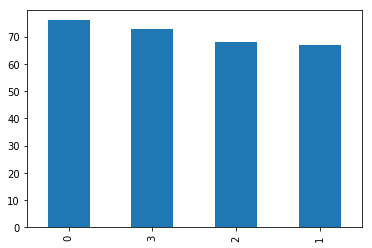

Total Debt/Total Assets - Drawing...


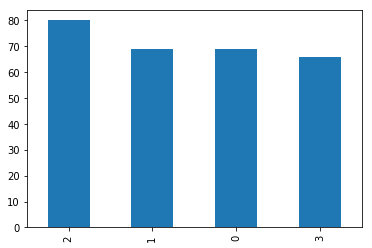

Total Debt/Capital - Drawing...


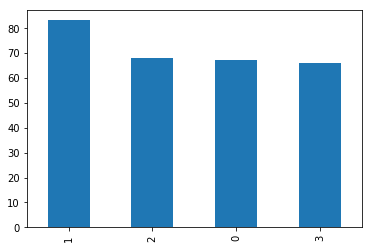

Total Debt/Equity - Drawing...


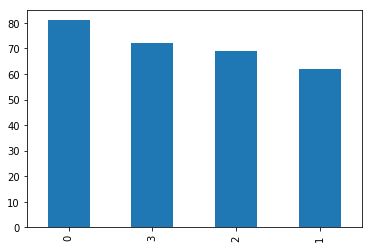

Asset Turnover - Drawing...


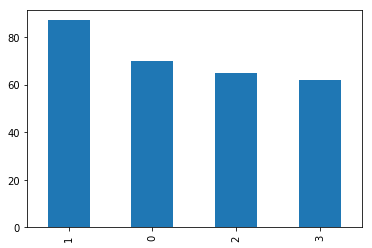

Price/Book - Drawing...


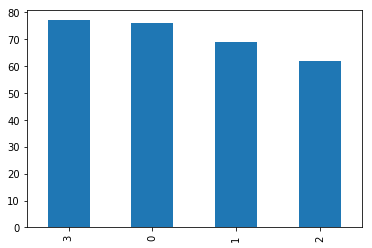

MonthlyBeta - Drawing...


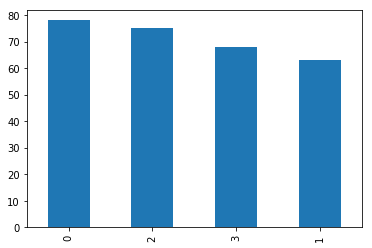

MonthlyReturn - Drawing...


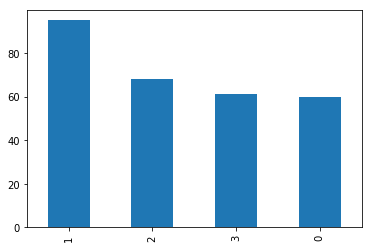

VolatilityWeekly - Drawing...


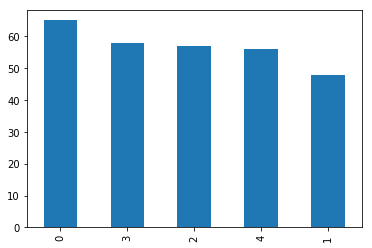

TradingVolumnWeekly - Drawing...


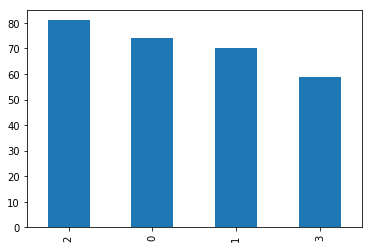

In [50]:
for ele in data:
    print(ele + " - Drawing...")
    featureTable[ele].value_counts().plot('bar')
    import matplotlib.pyplot as plt
    plt.show()
    #import sys
    #sys.stdout.flush()

In [ ]:
for i in range( len(data['MonthlyBeta']) ):
    print( len(data['MonthlyBeta'][i]) )

In [40]:
pickle.dump( featureTable, open( "features_first.pickle", "wb" ) )

In [14]:
print( len(company['TradingVolumnWeekly']) )

284


In [ ]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

In [29]:
dataframe = data['P/E (Diluted, Excl. EI)']

from tslearn.utils import to_time_series_dataset 
from sklearn import preprocessing
from tslearn.clustering import GlobalAlignmentKernelKMeans

pddd = pd.DataFrame(data=dataframe)
pdddt = pddd.T
pdddt = pdddt.apply(pd.to_numeric, errors='coerce')
#pdddt = pdddt.apply(norm_to_zero_one)

time_series_list_new = pdddt.T.values

time_series_list_new2 = []

#for i in range(0, len(time_series_list_new)):
#    listttt = [x for x in time_series_list_new[i] if str(x) != 'nan' and str(x) != 'NaN']
#    time_series_list_new2.append(listttt)

# Quick & Dirty Fix for len 25

#for i in range(0, len(time_series_list_new)):
#    if len(time_series_list_new[i]) > 24:
#        time_series_list_new[i].pop(25)
#    #print( len(time_series_list_new[i]) )
#    time_series_list_new2.append(time_series_list_new[i])
print(time_series_list_new)
pdddt.T.describe()

[[15.16  17.028 13.595 ... 11.496    nan    nan]
 [ 9.173  8.295  7.672 ... 12.031 13.896    nan]
 [11.279 11.991 12.392 ... 10.254    nan    nan]
 ...
 [16.491  2.376  2.128 ... 17.204    nan    nan]
 [ 2.659  2.288 16.491 ... 13.233 14.603 17.204]
 [ 2.793  2.659  2.288 ...    nan    nan    nan]]


0           1           2           3           4           5   \
count  284.000000  284.000000  284.000000  284.000000  284.000000  284.000000   
mean    16.061021   11.061694   14.214106   16.037722   15.586613   15.683486   
std     29.882308   50.636725   18.037197   24.987952   19.900565   38.214800   
min    -61.122000 -804.500000  -61.122000  -61.592000  -82.139000 -406.000000   
25%      9.929250    9.374500    8.820500   10.006750   10.381500   10.294250   
50%     14.536500   14.580000   14.346500   14.512000   14.524500   14.480000   
75%     20.134250   19.656250   18.988750   19.202250   19.296000   18.972000   
max    448.571000  114.607000  201.139000  301.838000  239.909000  283.267000   

               6           7           8           9   ...          14  \
count  284.000000  284.000000  284.000000  284.000000  ...  284.000000   
mean    14.275570   14.015250   15.808102   15.683264  ...   15.296923   
std     37.188437   20.154222   23.947342   25.377926  ...   20.057414   
min   -406.000000 -183.650000 -159.250000 -183.650000  ... -159.250000   
25%     10.445000   10.653250   10.984250   10.957500  ...   10.797000   
50%     14.408500   14.456000   14.422000   14.565500  ...   14.499000   
75%     18.742500   18.742500   19.475500   19.236000  ...   18.928250   
max    283.267000   93.537000  292.639000  292.639000  ...  114.607000   

               15          16          17          18          19          20  \
count  284.000000  284.000000  284.000000  284.000000  284.000000  284.000000   
mean    15.951144   16.405979   16.224919   16.664243   18.072345   15.083891   
std     22.019544   18.543045   19.683566   32.184267   31.020639   28.440381   
min   -183.650000 -110.040000 -107.070000 -255.000000 -107.070000 -255.000000   
25%     10.841500   10.860250   11.019750   10.944000   11.028750   11.274750   
50%     14.280000   14.143000   14.184500   14.499000   14.609000   14.855000   
75%     18.497000   18.296000   18.430250   19.024750   19.625500   19.983250   
max    173.903000  173.903000  177.600000  375.500000  375.500000  287.250000   

               21          22          23  
count  202.000000  127.000000   62.000000  
mean    16.577876   14.816882   17.080129  
std     17.429405   26.070315   24.793946  
min   -148.930000 -205.000000 -117.960000  
25%     11.522500   11.865000   12.695000  
50%     15.370500   15.488000   15.869000  
75%     20.417000   20.368500   21.479000  
max    127.449000  103.422000  103.422000  

[8 rows x 24 columns]

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(time_series_list_new)
time_series_list_new = scaler.transform(time_series_list_new)

print(time_series_list_new)

X = to_time_series_dataset(time_series_list_new)

#print(len(X))

#for i in range( len(X) ):
#    print( len(X[i]) )
    
#for i in range(0, len(X)):
#    if len(X[i]) > 24:
#        X[i].pop(0)

#print(X)

#for i in range( len(X) ):
#    print( len(X[i]) )

n_cluster = 5

#print("Gotten n_cluster : " + str(n_cluster))

gak_km = GlobalAlignmentKernelKMeans(n_clusters=n_cluster, n_init=20, max_iter=100, verbose=False, random_state=0).fit(X)

labels_gak = gak_km.fit_predict(X)


aaaaa = pd.DataFrame(data=time_series_list_new)
aaaaa.describe()


[[-0.03020555  0.11803366 -0.03438442 ... -0.29229352         nan
          nan]
 [-0.23091188 -0.05473453 -0.36334105 ... -0.261522   -0.0354629
          nan]
 [-0.16031099  0.01838481 -0.10119766 ... -0.36372944         nan
          nan]
 ...
 [ 0.01441448 -0.17183232 -0.67124846 ...  0.03601267         nan
          nan]
 [-0.4492852  -0.17357325  0.1264561  ... -0.19238675 -0.00823653
   0.0050368 ]
 [-0.44479302 -0.16623362 -0.66236224 ...         nan         nan
          nan]]


0             1             2             3             4   \
count  2.840000e+02  2.840000e+02  2.840000e+02  2.840000e+02  2.840000e+02   
mean   1.813886e-16 -5.003822e-17  9.382166e-17 -3.002293e-16 -3.752867e-17   
std    1.001765e+00  1.001765e+00  1.001765e+00  1.001765e+00  1.001765e+00   
min   -2.587460e+00 -1.613456e+01 -4.184081e+00 -3.112170e+00 -4.919364e+00   
25%   -2.055596e-01 -3.337838e-02 -2.995547e-01 -2.417812e-01 -2.620177e-01   
50%   -5.110757e-02  6.960397e-02  7.353031e-03 -6.116608e-02 -5.346519e-02   
75%    1.365497e-01  1.700293e-01  2.651783e-01  1.268657e-01  1.867251e-01   
max    1.449933e+01  2.048475e+00  1.038159e+01  1.145771e+01  1.129206e+01   

                 5             6             7             8             9   \
count  2.840000e+02  2.840000e+02  2.840000e+02  2.840000e+02  2.840000e+02   
mean   1.876433e-17  1.876433e-16  1.876433e-16 -3.002293e-16 -2.251720e-16   
std    1.001765e+00  1.001765e+00  1.001765e+00  1.001765e+00  1.001765e+00   
min   -1.105404e+01 -1.132119e+01 -9.824947e+00 -7.323031e+00 -7.868458e+00   
25%   -1.412738e-01 -1.031862e-01 -1.671081e-01 -2.017914e-01 -1.865442e-01   
50%   -3.154826e-02  3.580797e-03  2.190747e-02 -5.798342e-02 -4.412249e-02   
75%    8.620532e-02  1.203281e-01  2.349679e-01  1.534146e-01  1.402403e-01   
max    7.014452e+00  7.245969e+00  3.952627e+00  1.158039e+01  1.093252e+01   

       ...            14            15            16            17  \
count  ...  2.840000e+02  2.840000e+02  2.840000e+02  2.840000e+02   
mean   ...  1.501147e-16 -2.501911e-17 -4.128153e-16 -3.064841e-16   
std    ...  1.001765e+00  1.001765e+00  1.001765e+00  1.001765e+00   
min    ... -8.717726e+00 -9.080728e+00 -6.831089e+00 -6.274908e+00   
25%    ... -2.247481e-01 -2.324600e-01 -2.996012e-01 -2.649092e-01   
50%    ... -3.985215e-02 -7.602766e-02 -1.222547e-01 -1.038440e-01   
75%    ...  1.813662e-01  1.158221e-01  1.021061e-01  1.122370e-01   
max    ...  4.960030e+00  7.185920e+00  8.508583e+00  8.212940e+00   

                 18            19            20            21            22  \
count  2.840000e+02  2.840000e+02  2.840000e+02  2.020000e+02  1.270000e+02   
mean  -3.877962e-16 -2.603551e-16 -1.845159e-16 -4.089138e-16  8.392237e-17   
std    1.001765e+00  1.001765e+00  1.001765e+00  1.002484e+00  1.003960e+00   
min   -8.455802e+00 -4.041285e+00 -9.513257e+00 -9.519492e+00 -8.465086e+00   
25%   -1.780479e-01 -2.274624e-01 -1.341707e-01 -2.907693e-01 -1.136761e-01   
50%   -6.739520e-02 -1.118436e-01 -8.062300e-03 -6.944448e-02  2.584457e-02   
75%    7.347298e-02  5.015682e-02  1.725718e-01  2.208143e-01  2.137912e-01   
max    1.116910e+01  1.154259e+01  9.586599e+00  6.376958e+00  3.412158e+00   

                 23  
count  6.200000e+01  
mean   5.730183e-17  
std    1.008163e+00  
min   -5.490958e+00  
25%   -1.783067e-01  
50%   -4.924654e-02  
75%    1.788655e-01  
max    3.510805e+00  

[8 rows x 24 columns]